In [135]:
import pandas as pd
import numpy as np

In [4]:
retail_data_set = pd.read_excel('Online Retail Data Set.xlsx')
retail_data_set

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [35]:
# Make a copy and drop all empty cells
retail_data = retail_data_set.copy().dropna()
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [37]:
# check if there is an empty cell
retail_data.isnull().values.any()

False

In [41]:
# check for outliers in the quantity (extremely high values, negative values, etc)
retail_data['Quantity'].sort_values(ascending=False)

540421    80995
61619     74215
502122    12540
421632     4800
206121     4300
          ...  
160144    -2000
160145    -3114
4287      -9360
61624    -74215
540422   -80995
Name: Quantity, Length: 406829, dtype: int64

In [46]:
# Check outliers that are higher than 4800
higher = retail_data[retail_data["Quantity"] > 4800]
higher

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [45]:
# Check outliers with 0 to negative
negative = retail_data[retail_data["Quantity"] <= 0]
negative

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [63]:
# Delete values with greater than 4,800 (only three transactions, incconsistent)
for values in retail_data.index: 
    if retail_data.loc[values, "Quantity"] > 4800: 
        retail_data.drop(values, inplace=True)

retail_data[retail_data["Quantity"] > 4800].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [58]:
retail_data[retail_data["Quantity"] <= 0].count()

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64

In [65]:
for values in retail_data.index: 
    if retail_data.loc[values, "Quantity"] <= 0: 
        retail_data.drop(values, inplace=True)
retail_data[retail_data["Quantity"] <= 0].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [69]:
# Convert customer ID to int
retail_data['CustomerID'] = retail_data['CustomerID'].astype(int)
retail_data['CustomerID']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 397921, dtype: int32

In [79]:
# Check start and end date
start_date = retail_data['InvoiceDate'].min()
end_date = retail_data['InvoiceDate'].max()
print(f"The start date of this record is {start_date}, and the end date is {end_date}.")

The start date of this record is 2010-12-01 08:26:00, and the end date is 2011-12-09 12:50:00.


In [92]:
retail_data['Revenue'] = retail_data['Quantity'] * retail_data['UnitPrice']
retail_data['Revenue'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Revenue, dtype: float64

In [97]:
# Revenue per month
# What is the revenue per month
monthly_rev = retail_data.groupby(retail_data['InvoiceDate'].dt.month)['Revenue'].count() 
monthly_rev

InvoiceDate
1     21231
2     19928
3     27177
4     22644
5     28322
6     27185
7     26827
8     27013
9     40030
10    49557
11    64544
12    43463
Name: Revenue, dtype: int64

<Axes: xlabel='InvoiceDate'>

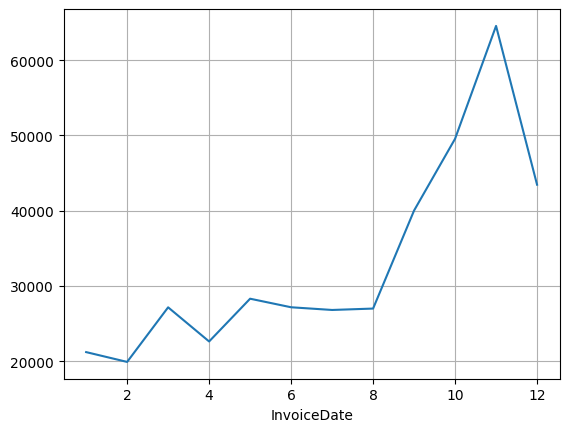

In [99]:
monthly_rev.plot.line(grid=True)

In [126]:
# Revenue per country except UK
wo_uk = retail_data.loc[retail_data['Country'] != 'United Kingdom']
per_country = wo_uk.groupby(retail_data['Country'])['Quantity', 'Revenue'].sum().sort_values(by='Revenue', ascending=False)
top_countries = per_country.head(10)
top_countries

C:\Program Files\Sublime Text\sublime_text.exe\ipykernel_15664\3601195686.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  per_country = wo_uk.groupby(retail_data['Country'])['Quantity', 'Revenue'].sum().sort_values(by='Revenue', ascending=False)


,Quantity,Revenue
Country,,
Netherlands,200937,285446.34
EIRE,140525,265545.90
Germany,119263,228867.14
France,111472,209024.05
Australia,84209,138521.31
Spain,27951,61577.11
Switzerland,30083,56443.95
Belgium,23237,41196.34
Sweden,36083,38378.33


<Axes: xlabel='Country'>

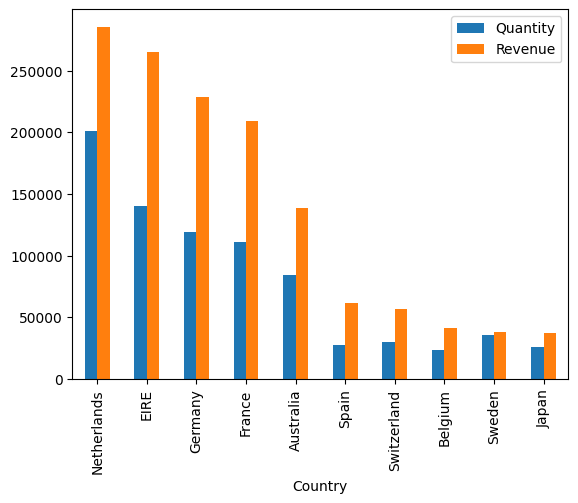

In [127]:
top_countries.plot.bar()

In [131]:
# Top revenue generated by the top 10 customers
top_cust = retail_data.groupby('CustomerID').agg({'Quantity': 'sum', 'Revenue': 'sum'}).sort_values(by='Revenue', ascending=False).head(10)
top_cust

,Quantity,Revenue
CustomerID,,
14646,197491,280206.02
18102,64124,259657.30
17450,69993,194550.79
14911,80515,143825.06
12415,77670,124914.53
14156,57885,117379.63
17511,64549,91062.38
16029,40208,81024.84
16684,50255,66653.56


<Axes: xlabel='CustomerID'>

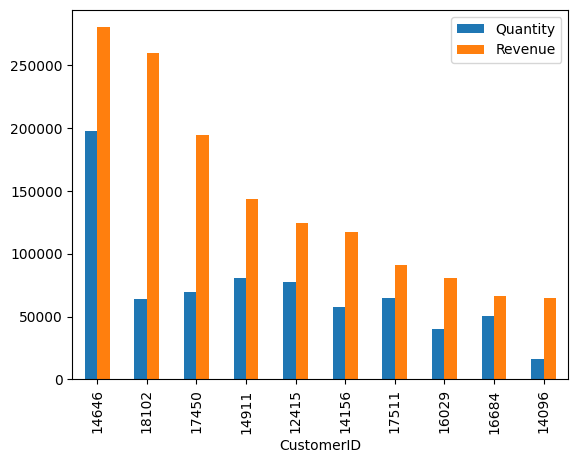

In [132]:
top_cust.plot.bar()

Findings: 
- The month where the top revenue is generated happened at November
- Netherlands is at the top earning country
- The top customer has a spending of over 280,206